In [1]:
# Подключение библиотек
import numpy as np
import matplotlib.pyplot as plt

Построение фазавого портрета

/tmp/ipython-input-1311967639.py:122: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(E1_grid, E2_grid, dE1_dt, levels=[0], colors='darkred',
/tmp/ipython-input-1311967639.py:124: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(E1_grid, E2_grid, dE2_dt, levels=[0], colors='darkblue',


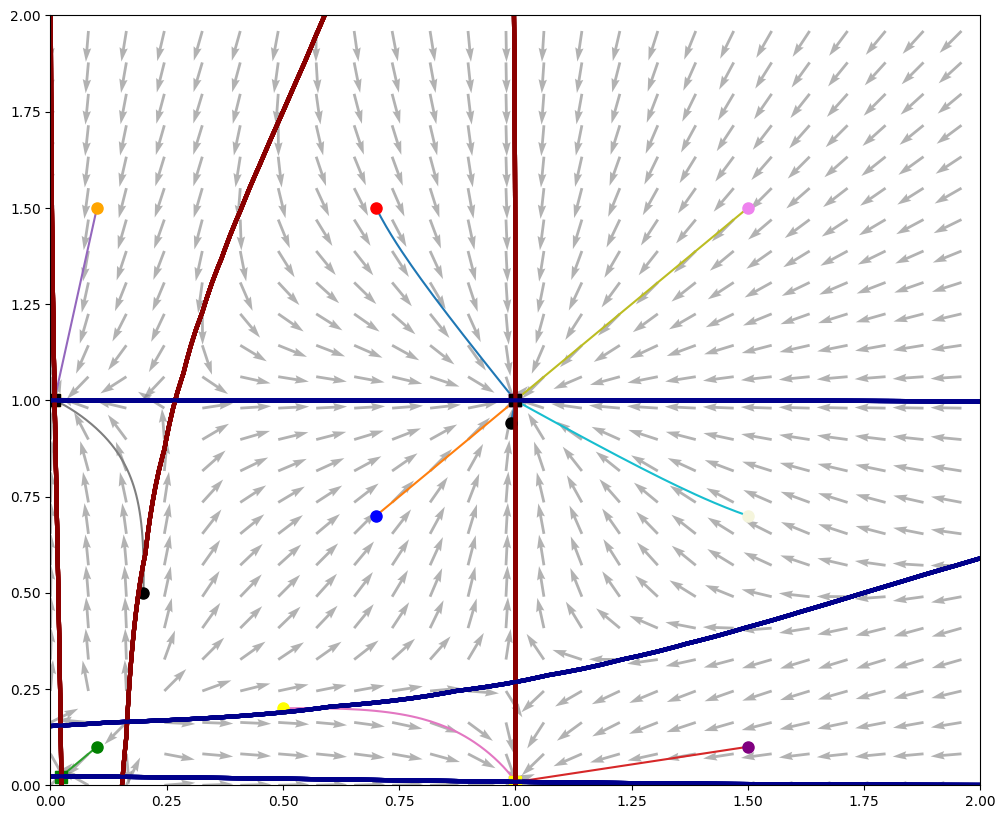

In [2]:
# Определение функций активации
# Функция активации E
def F(x, beta=1.0, theta=4.0):
    return 1 / (1 + np.exp(-beta * (x - theta)))
# Функция активации I
def G(x, beta=1.0, theta=4.0):
    return 1 / (1 + np.exp(-beta * (x - theta)))

# Параметры сети
def plot_phase_portrait(F = F, G = G,w_ee = 14.0,w_ei = 4.0,w_ie = 7.0,w_ii = 1.0):


    # Внешние токи
    I_ext1 = 0.0 # Внешний вход на E1
    I_ext2 = 0.0 # Внешний вход на E2
    I_ext_i = 0.0 # Внешний вход на I

    # Параметры времени
    tau_e = 0.02
    # tau_i << 1

    # Постороение векторного поля

    # Создаем сетку значений E1 и E2
    E1_values = np.linspace(0, 2, 50)
    E2_values = np.linspace(0, 2, 50)
    E1_grid, E2_grid = np.meshgrid(E1_values, E2_values)

    # Рассчитаем dE1/dt и dE2/dt для каждой точки сетки
    dE1_dt = np.zeros_like(E1_grid)
    dE2_dt = np.zeros_like(E2_grid)

    for i in range(len(E1_values)):
        for j in range(len(E2_values)):
            E1 = E1_grid[i, j]
            E2 = E2_grid[i, j]

            # Мгновенное вычисление активности I
            # I_activity = G(w_ei * (E1 + E2) + I_ext_i)
            I_guess = 0.0
            for _ in range(10):  # Несколько итераций для сходимости
                I_input = w_ei * (E1 + E2) - w_ii * I_guess + I_ext_i
                I_guess = G(I_input)
            I_activity = I_guess

            # Вычисление производных
            dE1_dt[i, j] = (-E1 + F(w_ee * E1 - w_ie * I_activity + I_ext1))/tau_e
            dE2_dt[i, j] = (-E2 + F(w_ee * E2 - w_ie * I_activity + I_ext2))/tau_e

    # Нормализуем стрелки для лучшего отображения
    magnitude = np.sqrt(dE1_dt**2 + dE2_dt**2)
    U_norm = dE1_dt / (magnitude + 1e-10)
    V_norm = dE2_dt / (magnitude + 1e-10)

    # Отображаем на графике

    plt.figure(figsize=(12, 10))

    # Построение векторного поля
    plt.quiver(E1_grid[::2, ::2], E2_grid[::2, ::2],
              U_norm[::2, ::2], V_norm[::2, ::2],
              scale=30, width=0.003, color='gray', alpha=0.6,
              label='Векторное поле')

    # Постороение траекторий

    # Функция для вычисления производных
    def system_derivatives(state):
        E1, E2 = state
        # Мгновенное вычисление активности I (как в условии)
        I_activity = G(w_ei * (E1 + E2) + I_ext_i)

        # Вычисление производных
        dE1_dt = (-E1 + F(w_ee * E1 - w_ie * I_activity + I_ext1))/tau_e
        dE2_dt = (-E2 + F(w_ee * E2 - w_ie * I_activity + I_ext2))/tau_e

        return [dE1_dt, dE2_dt]

    # Начальные условия
    initial_conditions = [
        [0.7, 1.5],
        [0.7, 0.7],
        [0.1, 0.1],
        [1.5, 0.1],
        [0.1, 1.5],
        [1.0, 1.0],
        [0.5, 0.2],
        [0.2, 0.5],
        [1.5, 1.5],
        [1.5, 0.7],
        [0.99, 0.94],
    ]

    # Цвета для разных траекторий
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown','yellow','black', 'violet', 'beige','black']

    T = 10
    dt = 0.001
    t_arr = np.arange(0, T, dt)

    # Интегрируем траектории для разных начальных условий
    e1 = np.zeros_like(t_arr)
    e2 = np.zeros_like(t_arr)
    for i, (init_cond, color) in enumerate(zip(initial_conditions, colors)):
      e1[0] = init_cond[0]
      e2[0] = init_cond[1]
      for j in range(1,len(t_arr)):

        de1, de2 = system_derivatives([e1[j-1],e2[j-1]])
        e1[j]= e1[j-1]+de1*dt
        e2[j] = e2[j-1]+de2*dt

      # Рисуем траекторию
      plt.plot(e1,e2)
      # Рисуем начальную точку
      plt.plot(init_cond[0], init_cond[1], 'o', color=color, markersize=8)

      # Рисуем конечную точку
      plt.plot(e1[-1], e2[-1], 's', color=color, markersize=8)

      # Построение изоклин
      plt.contour(E1_grid, E2_grid, dE1_dt, levels=[0], colors='darkred',
                linewidths=3, linestyles='-', label='dE1/dt = 0')
      plt.contour(E1_grid, E2_grid, dE2_dt, levels=[0], colors='darkblue',
                linewidths=3, linestyles='-', label='dE2/dt = 0')

w_ee = 16#14.0
w_ei = 2#4.0
w_ie = 8#7.0
w_ii = 1.0
plot_phase_portrait(F = F, G = G,w_ee = w_ee,w_ei = w_ei,w_ie = w_ie,w_ii = w_ii)


Симуляция

300
1300
3300


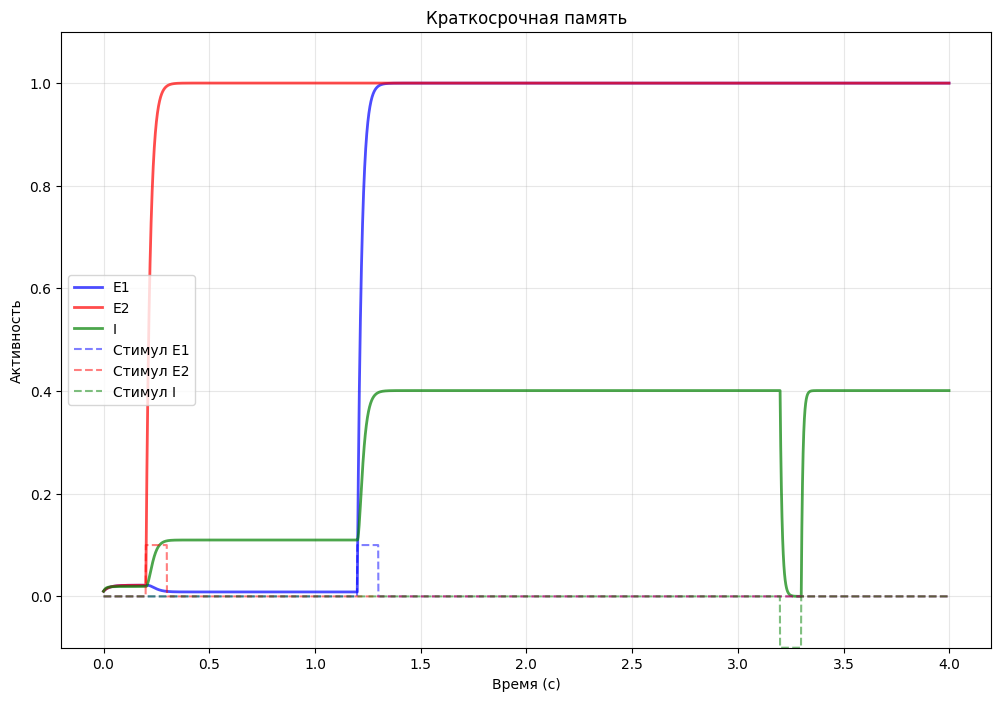

In [3]:
# Настройки симуляции
total_time = 4.0     # Общее время симуляции
dt = 0.001          # Шаг интегрирования
n_steps = int(total_time / dt)

# Настройки стимулов
# Стимул на E2
stimulus_time_E2 = 0.2     # Время начала стимула на E2
stimulus_duration_E2 = 0.1 # Длительность стимула на E2
stimulus_strength_E2 = 10 # Сила стимула на E2

# Стимул на E1, чтоб проверить переключение
stimulus_time_E1 = stimulus_time_E2 + 1.0     # Время начала стимула на E1
stimulus_duration_E1 = 0.1 # Длительность стимула на E1
stimulus_strength_E1 = 10 # Сила стимула на E1

# Стимул на I, чтоб устойчивость
stimulus_time_I = stimulus_time_E1 + 2.0     # Время начала стимула на E1
stimulus_duration_I = 0.1 # Длительность стимула на E1
stimulus_strength_I = -10 # Сила стимула на E1

# Создаем массивы для хранения стимулов в каждый момент времени
I_ext1 = np.zeros(n_steps)
I_ext2 = np.zeros(n_steps)
I_ext_i = np.zeros(n_steps)

# Задаём стимулы

def stimulus(stimulus_time,stimulus_duration,stimulus_strength,I_ext):
  start_idx = int(stimulus_time / dt)
  end_idx = int((stimulus_time + stimulus_duration) / dt)
  I_ext[start_idx:end_idx] = stimulus_strength
  print(end_idx)

stimulus(stimulus_time_E2,stimulus_duration_E2,stimulus_strength_E2,I_ext2)
stimulus(stimulus_time_E1,stimulus_duration_E1,stimulus_strength_E1,I_ext1)
stimulus(stimulus_time_I,stimulus_duration_I,stimulus_strength_I,I_ext_i)

def simulation(F = F, G = G,w_ee = w_ee,w_ei = w_ei,w_ie = w_ie,w_ii = w_ii,I_ext1 =I_ext1,I_ext2=I_ext2,I_ext_i=I_ext_i,scale=100,total_time=total_time,dt=dt):

    # Инициализация массивов для результатов
    time = np.arange(0, total_time, dt)
    n_steps = int(total_time / dt)
    r_e1 = np.zeros(n_steps)
    r_e2 = np.zeros(n_steps)
    r_i = np.zeros(n_steps)

    # Начальные условия (оба пула в состоянии покоя)
    r_e1[0] = 0.01
    r_e2[0] = 0.01
    r_i[0] = 0.01

    tau_i = 0.01
    tau_e = 0.02

    for i in range(1, n_steps):
        # Текущие значения активности
        current_r_e1 = r_e1[i-1]
        current_r_e2 = r_e2[i-1]
        current_r_i = r_i[i-1]

        # Текущие значения стимулов (берутся из заранее заданных массивов)
        current_I_ext1 = I_ext1[i-1]  # СТИМУЛ ДЛЯ E1 В МОМЕНТ ВРЕМЕНИ i-1
        current_I_ext2 = I_ext2[i-1]  # СТИМУЛ ДЛЯ E2 В МОМЕНТ ВРЕМЕНИ i-1
        current_I_ext_i = I_ext_i[i-1]  # СТИМУЛ ДЛЯ I В МОМЕНТ ВРЕМЕНИ i-1

        # Вычисляем входы для каждой популяции
        input_e1 = w_ee * current_r_e1 - w_ie * current_r_i + current_I_ext1
        input_e2 = w_ee * current_r_e2 - w_ie * current_r_i + current_I_ext2
        input_i = w_ei * (current_r_e1 + current_r_e2) - w_ii * current_r_i + current_I_ext_i

        # Вычисляем производные (dr/dt)
        dr_e1_dt = (-current_r_e1 + F(input_e1)) / tau_e
        dr_e2_dt = (-current_r_e2 + F(input_e2)) / tau_e
        dr_i_dt = (-current_r_i+G(input_i))/ tau_i

        # Интегрируем (метод Эйлера)
        r_e1[i] = current_r_e1 + dr_e1_dt * dt
        r_e2[i] = current_r_e2 + dr_e2_dt * dt
        r_i[i] = current_r_i +dr_i_dt*dt



    # Визуализация результатов
    plt.figure(figsize=(12, 8))

    # Активности нейронов
    plt.plot(time, r_e1, 'b-', linewidth=2, label='E1', alpha=0.7)
    plt.plot(time, r_e2, 'r-', linewidth=2, label='E2', alpha=0.7)
    plt.plot(time, r_i, 'g-', linewidth=2, label='I', alpha=0.7)

    plt.plot(time, I_ext1/scale, 'b--', alpha=0.5, label='Стимул E1')
    plt.plot(time, I_ext2/scale, 'r--', alpha=0.5, label='Стимул E2')
    plt.plot(time, I_ext_i/scale, 'g--', alpha=0.5, label='Стимул I')
    plt.xlabel('Время (с)')
    plt.ylabel('Активность')
    plt.title('Краткосрочная память')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(-0.1, 1.1)

simulation(F = F, G = G,w_ee = w_ee,w_ei = w_ei,w_ie = w_ie,w_ii = w_ii,I_ext1 =I_ext1,I_ext2=I_ext2,I_ext_i=I_ext_i,scale = 100,total_time=total_time,dt=dt)


/tmp/ipython-input-1311967639.py:122: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(E1_grid, E2_grid, dE1_dt, levels=[0], colors='darkred',
/tmp/ipython-input-1311967639.py:124: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(E1_grid, E2_grid, dE2_dt, levels=[0], colors='darkblue',


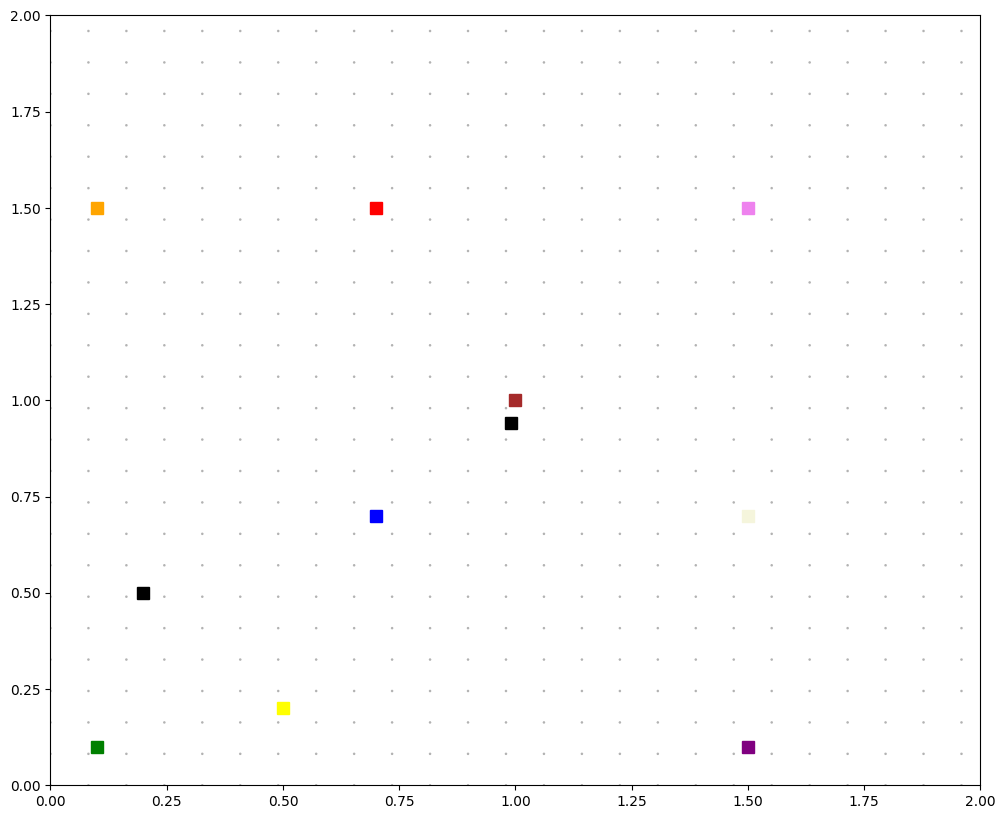

In [4]:
# Построение линейного атрактора
# Необходимо обнулить связи с ингибирующим пулом и вес рекурентных связей возбуждающего пула приравнять 1
# Функция Релу
def relu(x):
  return np.maximum(0,x)

plot_phase_portrait(F = relu, G = relu,w_ee = 1.0,w_ei = 0.0,w_ie = 0.0,w_ii = 1.0)


300
600
900


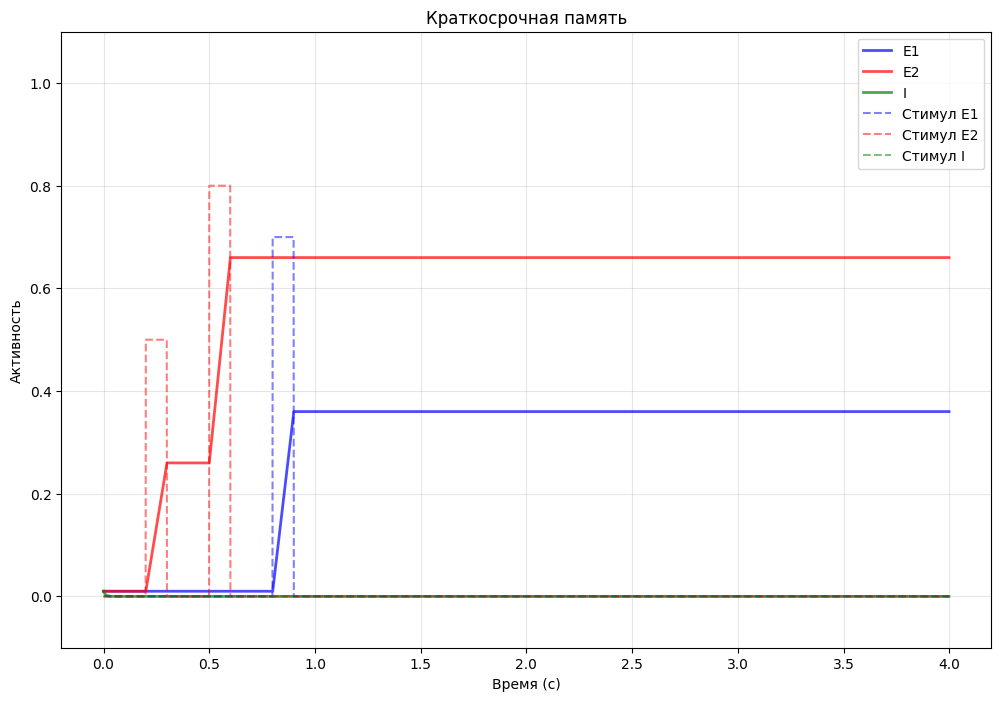

In [5]:

# Стимул на E2
stimulus_time_E2_1 = 0.2     # Время начала стимула на E2
stimulus_duration_E2_1 = 0.1 # Длительность стимула на E2
stimulus_strength_E2_1 = 0.05 # Сила стимула на E2

# Стимул на E2
stimulus_time_E2_2 = 0.5     # Время начала стимула на E2
stimulus_duration_E2_2 = 0.1 # Длительность стимула на E2
stimulus_strength_E2_2 = 0.08 # Сила стимула на E2

# Стимул на E1
stimulus_time_E1_1 = 0.8     # Время начала стимула на E1
stimulus_duration_E1_1 = 0.1 # Длительность стимула на E1
stimulus_strength_E1_1 = 0.07 # Сила стимула на E1

I_ext2 = np.zeros(n_steps)
I_ext1 = np.zeros(n_steps)
I_ext_i = np.zeros(n_steps)

stimulus(stimulus_time_E2_1,stimulus_duration_E2_1,stimulus_strength_E2_1,I_ext2)
stimulus(stimulus_time_E2_2,stimulus_duration_E2_2,stimulus_strength_E2_2,I_ext2)
stimulus(stimulus_time_E1_1,stimulus_duration_E1_1,stimulus_strength_E1_1,I_ext1)

simulation(F = relu, G = relu,w_ee = 1,w_ei = 0,w_ie = 0,w_ii = 0,I_ext1 =I_ext1,I_ext2=I_ext2,I_ext_i=I_ext_i,scale=0.1,total_time=total_time,dt=dt)



Симуляция с пластичностью

(-0.1, 1.1)

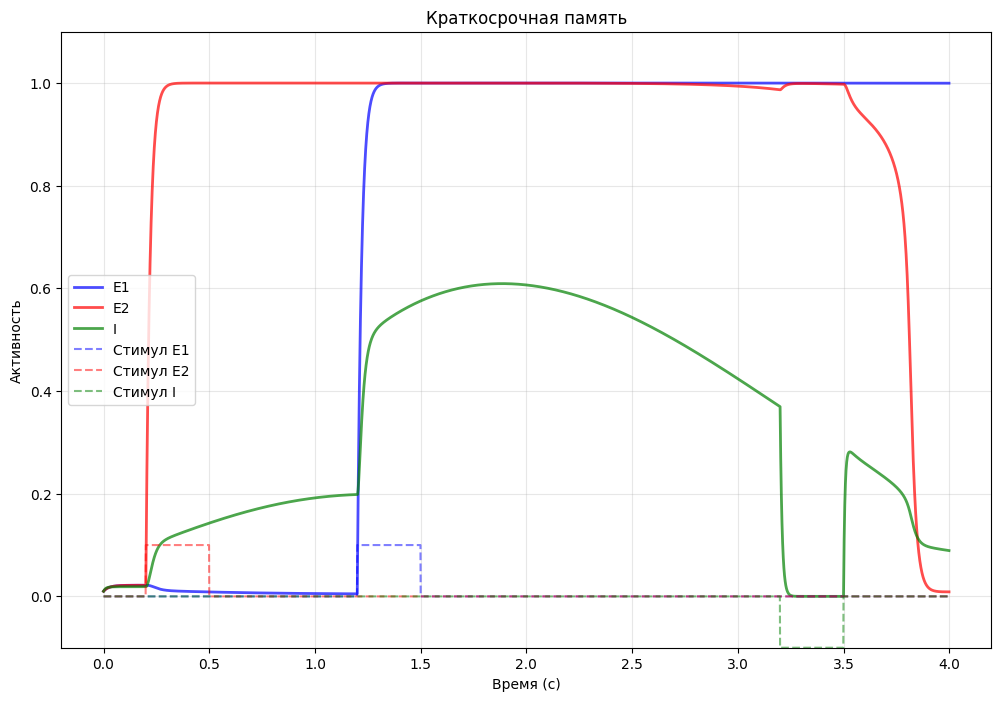

In [6]:
# Настройки симуляции
total_time = 4.0     # Общее время симуляции
dt = 0.001          # Шаг интегрирования
n_steps = int(total_time / dt)
w_ee = 70.0
w_ei = 10.0
w_ie = 30.0
w_ii = 2.0

# Настройки стимулов
# Стимул на E2
stimulus_time_E2 = 0.2     # Время начала стимула на E2
stimulus_duration_E2 = 0.3 # Длительность стимула на E2
stimulus_strength_E2 = 10 # Сила стимула на E2

# Стимул на E1, чтоб проверить переключение
stimulus_time_E1 = stimulus_time_E2 + 1.0     # Время начала стимула на E1
stimulus_duration_E1 = 0.3 # Длительность стимула на E1
stimulus_strength_E1 = 10 # Сила стимула на E1

# Стимул на I, чтоб устойчивость
stimulus_time_I = stimulus_time_E1 + 2.0     # Время начала стимула на E1
stimulus_duration_I = 0.3 # Длительность стимула на E1
stimulus_strength_I = -10 # Сила стимула на E1

# Создаем массивы для хранения стимулов в каждый момент времени
I_ext1 = np.zeros(n_steps)
I_ext2 = np.zeros(n_steps)
I_ext_i = np.zeros(n_steps)

# Задаём стимулы


def stimulus(stimulus_time,stimulus_duration,stimulus_strength,I_ext):
  start_idx = int(stimulus_time / dt)
  end_idx = int((stimulus_time + stimulus_duration) / dt)
  I_ext[start_idx:end_idx] = stimulus_strength

stimulus(stimulus_time_E2,stimulus_duration_E2,stimulus_strength_E2,I_ext2)
stimulus(stimulus_time_E1,stimulus_duration_E1,stimulus_strength_E1,I_ext1)
stimulus(stimulus_time_I,stimulus_duration_I,stimulus_strength_I,I_ext_i)
class STP:
    def __init__(self, U=0.3, tau_facil=300.0, tau_rec=200.0):
        self.U = U  # Базальная вероятность высвобождения
        self.tau_facil = tau_facil  # Постоянная времени фасилитации (мс)
        self.tau_rec = tau_rec  # Постоянная времени восстановления (мс)

    def update(self, u, x, r_pre, dt):
        """Обновление переменных пластичности"""
        # Динамика фасилитации (u)
        du_dt = (self.U - u)/self.tau_facil + self.U*(1 - u)*r_pre
        u_new = u + du_dt * dt

        # Динамика депрессии (x)
        dx_dt = (1 - x)/self.tau_rec - u * x * r_pre
        x_new = x + dx_dt * dt

        return np.clip(u_new, 0, 1), np.clip(x_new, 0, 1)

scale=100
# Инициализация массивов для результатов
time = np.arange(0, total_time, dt)
n_steps = int(total_time / dt)
r_e1 = np.zeros(n_steps)
r_e2 = np.zeros(n_steps)
r_i = np.zeros(n_steps)

stp = STP()
# Инициализация переменных пластичности
u_e1e1, x_e1e1 = 0.2, 1.0  # Самовозбуждение E1
u_e2e2, x_e2e2 = 0.2, 1.0  # Самовозбуждение E2
u_e1i, x_e1i = 0.2, 1.0    # E1 -> I
u_e2i, x_e2i = 0.2, 1.0    # E2 -> I
u_ie1, x_ie1 = 0.2, 1.0    # I -> E1
u_ie2, x_ie2 = 0.2, 1.0    # I -> E2

# Начальные условия (оба пула в состоянии покоя)
r_e1[0] = 0.01
r_e2[0] = 0.01
r_i[0] = 0.01

tau_i = 0.01
tau_e = 0.02

w_ee_eff_e1_ = np.zeros(n_steps)
w_ee_eff_e2_ = np.zeros(n_steps)
w_ei_eff_e1_ = np.zeros(n_steps)
w_ei_eff_e2_ = np.zeros(n_steps)
w_ie_eff_e1_ = np.zeros(n_steps)
w_ie_eff_e2_ = np.zeros(n_steps)

for i in range(1, n_steps):
    # Текущие значения активности
    current_r_e1 = r_e1[i-1]
    current_r_e2 = r_e2[i-1]
    current_r_i = r_i[i-1]

    # Текущие значения стимулов (берутся из заранее заданных массивов)
    current_I_ext1 = I_ext1[i-1]  # СТИМУЛ ДЛЯ E1 В МОМЕНТ ВРЕМЕНИ i-1
    current_I_ext2 = I_ext2[i-1]  # СТИМУЛ ДЛЯ E2 В МОМЕНТ ВРЕМЕНИ i-1
    current_I_ext_i = I_ext_i[i-1]  # СТИМУЛ ДЛЯ I В МОМЕНТ ВРЕМЕНИ i-1

    # Обновление пластичности
    u_e1e1, x_e1e1 = stp.update(u_e1e1, x_e1e1, current_r_e1, dt)
    u_e2e2, x_e2e2 = stp.update(u_e2e2, x_e2e2, current_r_e2, dt)
    u_e1i, x_e1i = stp.update(u_e1i, x_e1i, current_r_e1, dt)
    u_e2i, x_e2i = stp.update(u_e2i, x_e2i, current_r_e2, dt)
    u_ie1, x_ie1 = stp.update(u_ie1, x_ie1, current_r_i, dt)
    u_ie2, x_ie2 = stp.update(u_ie2, x_ie2, current_r_i, dt)
    # Эффективные веса с учетом пластичности
    w_ee_eff_e1 = w_ee * u_e1e1 * x_e1e1
    w_ee_eff_e2 = w_ee * u_e2e2 * x_e2e2
    w_ei_eff_e1 = w_ei * u_e1i * x_e1i
    w_ei_eff_e2 = w_ei * u_e2i * x_e2i
    w_ie_eff_e1 = w_ie * u_ie1 * x_ie1
    w_ie_eff_e2 = w_ie * u_ie2 * x_ie2

    w_ee_eff_e1_[i] = w_ee_eff_e1
    w_ee_eff_e2_[i] = w_ee_eff_e2
    w_ei_eff_e1_[i] = w_ei_eff_e1
    w_ei_eff_e2_[i] = w_ei_eff_e2
    w_ie_eff_e1_[i] = w_ie_eff_e1
    w_ie_eff_e2_[i] = w_ie_eff_e2


    # Вычисляем входы для каждой популяции
    input_e1 = w_ee_eff_e1 * current_r_e1 - w_ie_eff_e1 * current_r_i + current_I_ext1
    input_e2 = w_ee_eff_e2 * current_r_e2 - w_ie_eff_e2 * current_r_i + current_I_ext2
    input_i = w_ei_eff_e1 * current_r_e1 + w_ei_eff_e2 * current_r_e2 - w_ii * current_r_i + current_I_ext_i

    # Вычисляем производные (dr/dt)
    dr_e1_dt = (-current_r_e1 + F(input_e1)) / tau_e
    dr_e2_dt = (-current_r_e2 + F(input_e2)) / tau_e
    dr_i_dt = (-current_r_i+G(input_i))/ tau_i

    # Интегрируем (метод Эйлера)
    r_e1[i] = current_r_e1 + dr_e1_dt * dt
    r_e2[i] = current_r_e2 + dr_e2_dt * dt
    r_i[i] = current_r_i +dr_i_dt*dt



# Визуализация результатов
plt.figure(figsize=(12, 8))

# Активности нейронов
plt.plot(time, r_e1, 'b-', linewidth=2, label='E1', alpha=0.7)
plt.plot(time, r_e2, 'r-', linewidth=2, label='E2', alpha=0.7)
plt.plot(time, r_i, 'g-', linewidth=2, label='I', alpha=0.7)

plt.plot(time, I_ext1/scale, 'b--', alpha=0.5, label='Стимул E1')
plt.plot(time, I_ext2/scale, 'r--', alpha=0.5, label='Стимул E2')
plt.plot(time, I_ext_i/scale, 'g--', alpha=0.5, label='Стимул I')
plt.xlabel('Время (с)')
plt.ylabel('Активность')
plt.title('Краткосрочная память')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.1)



Изменение весов со временем

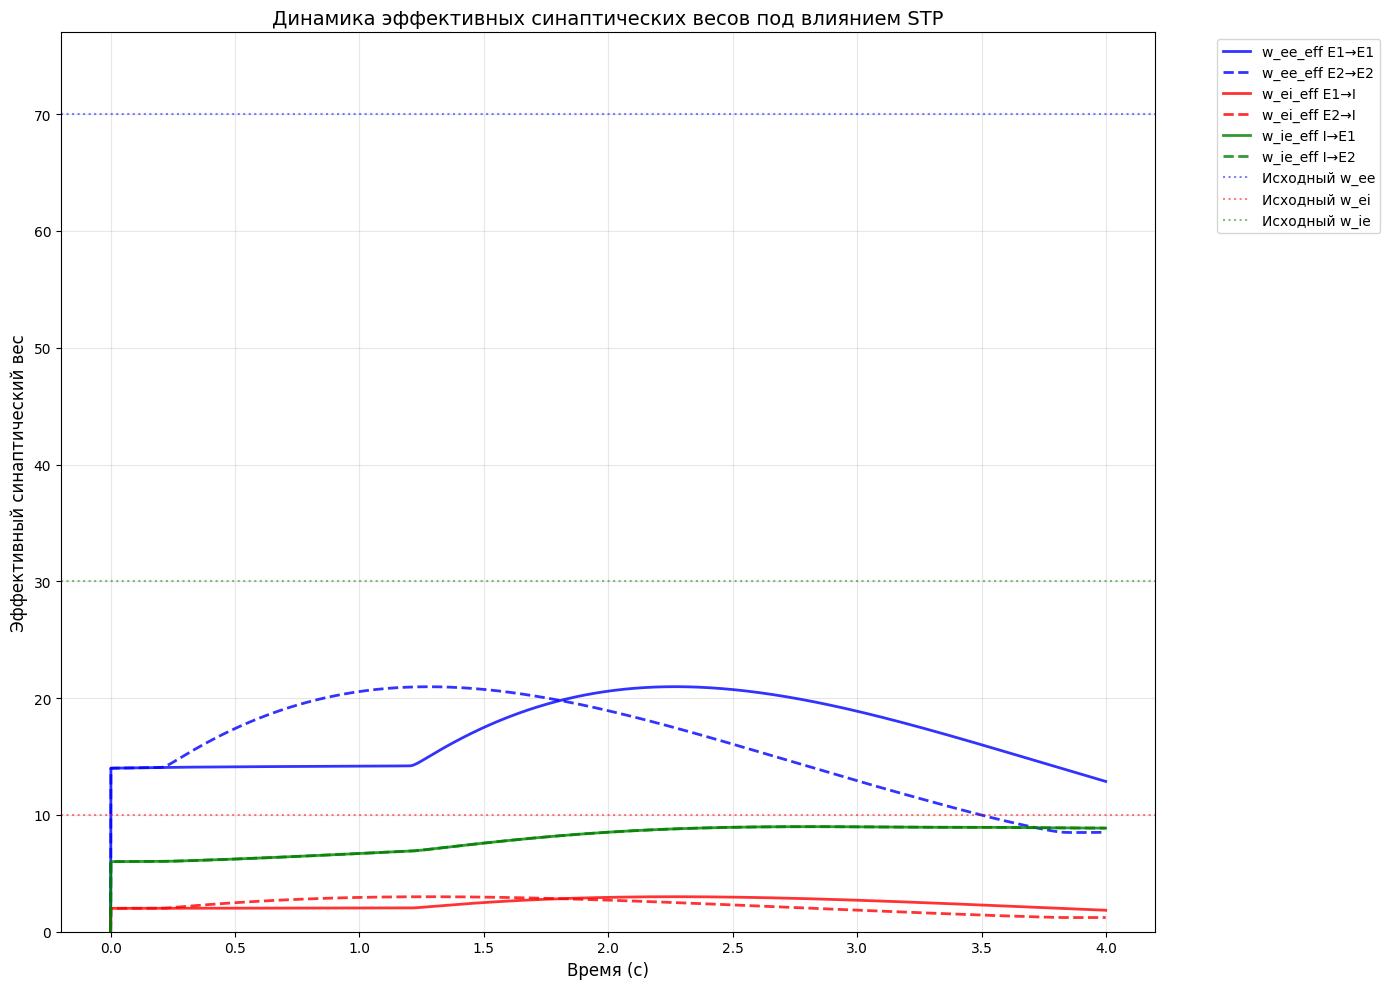

In [7]:
# Создаем график
plt.figure(figsize=(14, 10))

# Рисуем все эффективные веса
plt.plot(time, w_ee_eff_e1_, 'b-', linewidth=2, label='w_ee_eff E1→E1', alpha=0.8)
plt.plot(time, w_ee_eff_e2_, 'b--', linewidth=2, label='w_ee_eff E2→E2', alpha=0.8)
plt.plot(time, w_ei_eff_e1_, 'r-', linewidth=2, label='w_ei_eff E1→I', alpha=0.8)
plt.plot(time, w_ei_eff_e2_, 'r--', linewidth=2, label='w_ei_eff E2→I', alpha=0.8)
plt.plot(time, w_ie_eff_e1_, 'g-', linewidth=2, label='w_ie_eff I→E1', alpha=0.8)
plt.plot(time, w_ie_eff_e2_, 'g--', linewidth=2, label='w_ie_eff I→E2', alpha=0.8)

# Добавляем исходные веса для сравнения
plt.axhline(y=w_ee, color='blue', linestyle=':', alpha=0.5, label='Исходный w_ee')
plt.axhline(y=w_ei, color='red', linestyle=':', alpha=0.5, label='Исходный w_ei')
plt.axhline(y=w_ie, color='green', linestyle=':', alpha=0.5, label='Исходный w_ie')

# Настройки графика
plt.xlabel('Время (с)', fontsize=12)
plt.ylabel('Эффективный синаптический вес', fontsize=12)
plt.title('Динамика эффективных синаптических весов под влиянием STP', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.ylim(0, max(w_ee, w_ei, w_ie) * 1.1)  # Автоматическое масштабирование

plt.tight_layout()
plt.show()

In [8]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Создаем фигуру
fig, ax = plt.subplots(figsize=(10, 8))

# Выбираем точки для анимации (каждые 100 шагов)
animation_points = range(0, n_steps, 100)

# Функция для обновления анимации
def update(frame):
    ax.clear()
    i = animation_points[frame]

    # Берем эффективные веса для этого момента времени
    w_ee1 = w_ee_eff_e1_[i]
    w_ee2 = w_ee_eff_e2_[i]
    w_ei1 = w_ei_eff_e1_[i]
    w_ei2 = w_ei_eff_e2_[i]
    w_ie1 = w_ie_eff_e1_[i]
    w_ie2 = w_ie_eff_e2_[i]

    # Внешние токи
    I_ext1 = 0.0
    I_ext2 = 0.0
    I_ext_i = 0.0

    # Параметры времени
    tau_e = 0.02

    # Создаем сетку значений E1 и E2
    E1_values = np.linspace(0, 2, 30)
    E2_values = np.linspace(0, 2, 30)
    E1_grid, E2_grid = np.meshgrid(E1_values, E2_values)

    # Рассчитаем dE1/dt и dE2/dt для каждой точки сетки
    dE1_dt = np.zeros_like(E1_grid)
    dE2_dt = np.zeros_like(E2_grid)

    for k in range(len(E1_values)):
        for j in range(len(E2_values)):
            E1 = E1_grid[k, j]
            E2 = E2_grid[k, j]

            # Мгновенное вычисление активности I
            I_guess = 0.0
            for _ in range(10):
                I_input = w_ei1 * E1 + w_ei2 * E2 - w_ii * I_guess + I_ext_i
                I_guess = G(I_input)
            I_activity = I_guess

            # Вычисление производных
            dE1_dt[k, j] = (-E1 + F(w_ee1 * E1 - w_ie1 * I_activity + I_ext1))/tau_e
            dE2_dt[k, j] = (-E2 + F(w_ee2 * E2 - w_ie2 * I_activity + I_ext2))/tau_e

    # Нормализуем стрелки для лучшего отображения
    magnitude = np.sqrt(dE1_dt**2 + dE2_dt**2)
    U_norm = dE1_dt / (magnitude + 1e-10)
    V_norm = dE2_dt / (magnitude + 1e-10)

    # Векторное поле
    ax.quiver(E1_grid[::2, ::2], E2_grid[::2, ::2],
              U_norm[::2, ::2], V_norm[::2, ::2],
              scale=30, width=0.003, color='gray', alpha=0.6)

    # Нуль-изоклины
    ax.contour(E1_grid, E2_grid, dE1_dt, levels=[0], colors='darkred',
              linewidths=2, linestyles='-')
    ax.contour(E1_grid, E2_grid, dE2_dt, levels=[0], colors='darkblue',
              linewidths=2, linestyles='-')

    # Траектория системы до этого момента
    ax.plot(r_e1[:i+1], r_e2[:i+1], 'green', alpha=0.7, linewidth=1)
    ax.scatter(r_e1[i], r_e2[i], c='red', s=50, zorder=5)

    # Настройки графика
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.set_xlabel('E1 активность')
    ax.set_ylabel('E2 активность')
    ax.set_title(f'Дрейф аттрактора\n t = {time[i]:.2f} с\n'
                f'w_ee1 = {w_ee1:.1f}, w_ee2 = {w_ee2:.1f}')
    ax.grid(True, alpha=0.3)

    return ax

# Создаем анимацию
ani = FuncAnimation(fig, update, frames=len(animation_points), interval=100)

# Показываем анимацию
plt.close()
HTML(ani.to_jshtml())